In [18]:
import networkx as nx
import altair as alt
import nx_altair as nxa
from nx_altair.core import to_pandas_nodes

alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [36]:
G = nx.read_gml('/mnt/data/hDHFR_modSAR_graph.gml')
pos = nx.kamada_kawai_layout(G)
#pos = nx.spectral_layout(G)

In [4]:
G.nodes()['CHEMBL104787']

{'bestFold': 20,
 'community': 'm03',
 'degree': 8,
 'infomap': 'm12',
 'k': 0,
 'louvain': 'm03',
 'threshold': 0.3}

In [37]:
comm_sort = to_pandas_nodes(G, pos)['community'].value_counts()
comm_sort

m01    95
m02    55
m03    50
m04    47
m05    30
m06    29
m07    27
m08    14
m09    10
m11     6
m10     6
m12     2
m18     1
m16     1
m15     1
m19     1
m17     1
m13     1
m14     1
Name: community, dtype: int64

In [38]:
valid_communities = [comm for i, comm in enumerate(comm_sort.index) if i < 7]

for n in G.nodes():
    current_community = G.nodes[n]['louvain']
    if current_community not in valid_communities:
        G.nodes[n]['module'] = 'other'
    else:
        G.nodes[n]['module'] = current_community

In [40]:
to_pandas_nodes(G, pos)['module'].value_counts()

m01      95
m02      55
m03      50
m04      47
other    45
m05      30
m06      29
m07      27
Name: module, dtype: int64

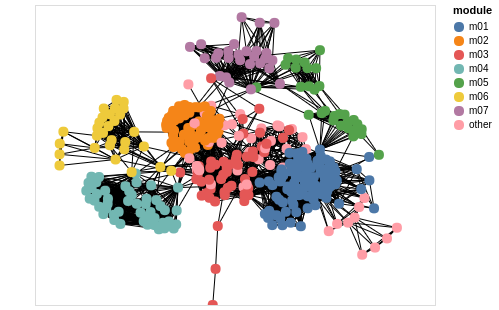

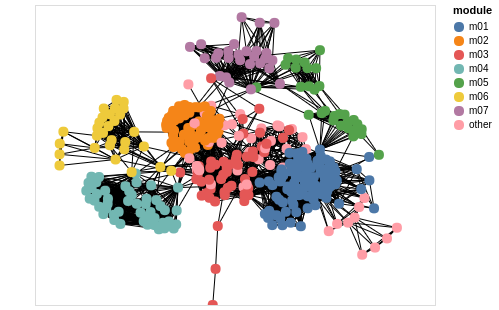

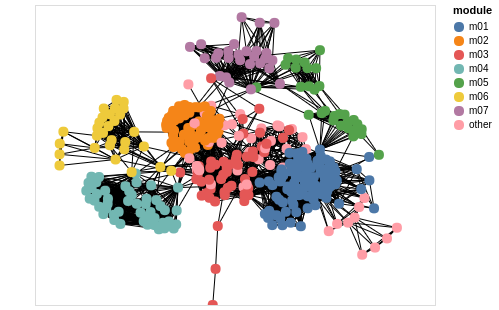

In [44]:
# Draw the graph using Altair
viz = nxa.draw_networkx(
    G=G,
    pos=pos,
    node_size=100,
    node_color='module',
    alpha=1.0)

viz.interactive()

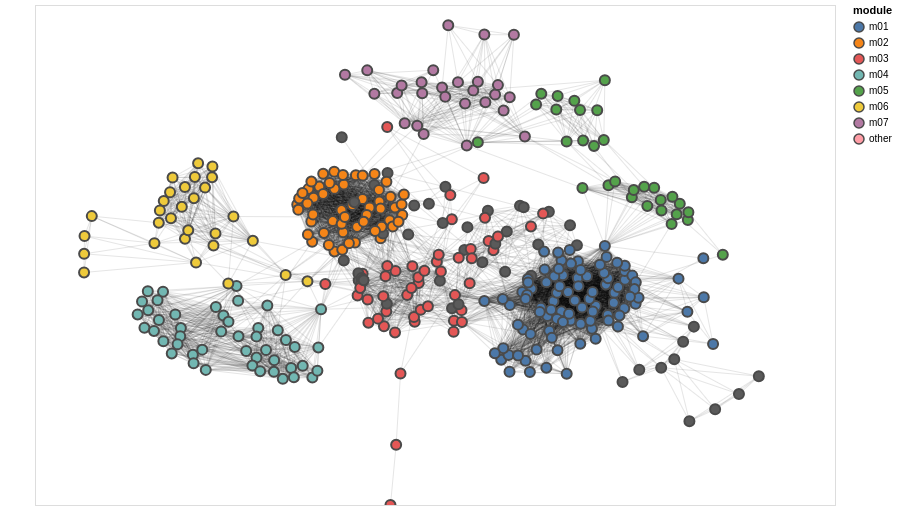

In [78]:
edges = viz.layer[0]
nodes = viz.layer[1]

edges = edges.encode(
    opacity=alt.value(0.1)
)

nodes = nodes.encode(
    stroke = alt.ColorValue('#4a4a4a'),
    fill=alt.condition('datum.module == "other"', alt.ColorValue('#5a5a5a'), 'module'),
    color=alt.condition('datum.module == "other"', alt.ColorValue('#5a5a5a'), 'module')
)

viz = alt.layer(edges, nodes)

viz.configure_axis(
        ticks=False,
        grid=False,
        domain=False,
        labels=False,
    ).properties(width=800, height=500).interactive()